In [1]:
# import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import glob
import sys
from shapely import wkt
import matplotlib.pyplot as plt 
from descartes import PolygonPatch

In [18]:
# set the path to the root directory of the git
path_root = r'C:/Users/miln/tubCloud/Work-in-progress/building-project/git-plos-paper'

# enable python to find the modules
sys.path.append(path_root)

# import own functions
from utils.preproc_utils import negative_buffer_with_one_neighbor
from utils.helpers import multipoly_to_largest_poly

In [3]:
crs = 25833

In [4]:
# import gdam
GDAM_GER1 = gpd.read_file(r'E:\ML_paper\Data\1-data_primary\GADM\Germany\gadm36_DEU_1.shp')
GDAM_GER1 = GDAM_GER1.to_crs(crs)

In [5]:
GDAM_POL0 = gpd.read_file(r'E:\ML_paper\Data\1-data_primary\GADM\Poland\gadm36_POL_0.shp', 
                     crs=crs) 
GDAM_POL0 = GDAM_POL0.to_crs(crs)

In [6]:
reg_boundary = GDAM_GER1[GDAM_GER1.NAME_1 == 'Brandenburg'].geometry.iloc[0]

In [7]:
neighbor_boundary = GDAM_POL0.geometry.iloc[0]

In [8]:
within_buff_no_neighbor = negative_buffer_with_one_neighbor(reg_boundary,neighbor_boundary)

In [9]:
within_buff_no_neighbor_df = pd.DataFrame({'geometry' : within_buff_no_neighbor.wkt}, 
                                         index = [0])

In [10]:
within_buff_no_neighbor_df

geometry
0  MULTIPOLYGON (((342129.3154979911 5763830.6189...

In [ ]:
within_buff_no_neighbor_df.to_csv(os.path.join(path_to_data_2,'1-Preprocessing','Germany','Brandenburg','2-match_w_gdam','within_500_no_pol.csv'),
                  index=False)

## Visualization

In [16]:
within_buff_no_neighbor_patch = PolygonPatch(within_buff_no_neighbor, alpha = 0.5)

In [20]:
reg_boundary = multipoly_to_largest_poly(reg_boundary)

In [21]:
reg_boundary_minus_buff = reg_boundary.buffer(-500)

In [22]:
reg_boundary_minus_buff = multipoly_to_largest_poly(reg_boundary_minus_buff)

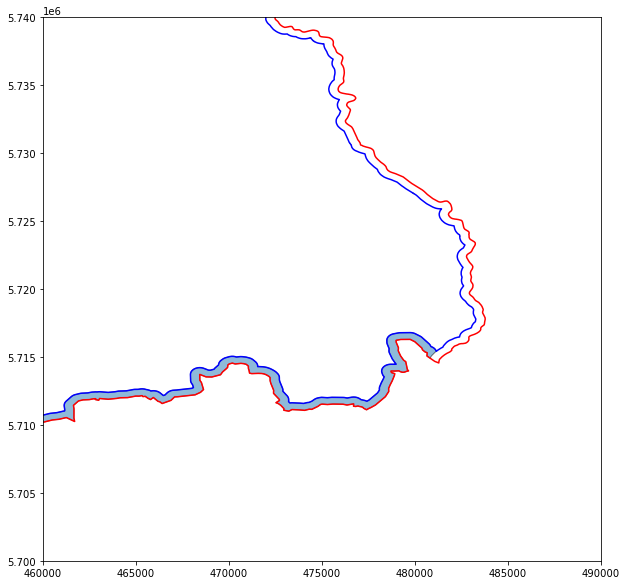

In [23]:
f, ax = plt.subplots(figsize=(10, 10))

plt.plot(*reg_boundary.exterior.xy, color='red')
plt.plot(*reg_boundary_minus_buff.exterior.xy, color='blue')

ax.add_patch(within_buff_no_neighbor_patch)
plt.xlim(460000,490000)
plt.ylim(5700000,5740000)

plt.show()